**Outline**

1. Topic Review
2. Case 1 - Automobile
3. Case 2 - United Nations: Urban Population and GDP
3. Case 2 - Orange Juice Optimal Price

- We need to import library and function that need to run the code in this notebook to:
  - load data
  - doing simulation
  - drawing graph and other visualization
  - print the estimated coefficient and standard error

In [1]:
%pip install "https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl"
# The following code is to import libraries necessary to run this notebook

# Data manipulation
import pandas as pd
import numpy as np

# Model fitting
import statsmodels.formula.api as smf

# Visualization
import matplotlib.pyplot as plt
import seaborn as sb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.5 MB/s eta 0:00:00


In [2]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results
    :return df: <pandas DataFrame>
    """
    coef = results.params
    std_err = results.bse

    df = pd.DataFrame(data = np.transpose([coef, std_err]),
                      index = coef.index,
                      columns=["coef","std err"])
    return df

## **Topic Review**
---

From the materials that have been learned in the video learning:

### **Logarithmic transformations**

- Logarithmic transformation is nonlinear tranformation that applied logarithmic function to the variables.
- Logarithmic transformation can **improve model performance** by linearizing the relationship between variables that have nonlinear relationship
- Logarithmic can be done in various way
  - Log Transform on predictor variables only
  - Log Transform on outcome variable only
  - Log Transform on both predictor and outcome

- To decide what's variables that need to do log transformation, you can plot the scatterplot of the data and think about the kind of relationships that may happens in the data, should certain unit difference in predictor correspond to certain unit difference in the outcome, or it should be a percentage difference?

Here's the summary of model interpretion where one or more variables in their log scale:
1. If model consist of predictor that transform to log scale
$$y=a+b\log x$$
> small percentage difference of predictor, x ($\nabla x \times 100 \%$), correspond to expected difference in outcome, y ($\Delta y$) for about $b \times \nabla x$, with

$$
\nabla x = \cfrac{x_{2}-x_{1}}{x_{1}}
$$

$$
\Delta y = y_{2} - y_{1}
$$

2. If model consist of outcome that transform to log scale
$$\log y=a+b x$$
> one unit difference in predictor, correspond to expected percentage difference in y for about b times 100%
3. If model consist of both predictor and outcome that transform to log scale
$$\log y=a+b\log x$$
> 1%  difference in a predictor correspond to the b% difference in outcome

Here's other advice to decide which variables that we need to transform, based on plot of the predictor x and outcome y

Source : [STAT 501: Regression Methods by Penn State's World Campus](https://online.stat.psu.edu/stat501/lesson/9/9.4)


<center>

| Tips      | Pattern |
| ----------- | ----------- |
| Use log transformation on the predictor only| <img src="https://online.stat.psu.edu/onlinecourses/sites/stat501/files/07transform/patterns4_plot.gif" width="280" height="200">!|
| Use log transformation on the outcome only, y| <img src="https://online.stat.psu.edu/onlinecourses/sites/stat501/files/07transform/patterns3_plot.gif" width="280" height="200">|
| Use log transformation on both the predictor and the outcome, x and y| <img src="https://online.stat.psu.edu/onlinecourses/sites/stat501/files/07transform/patterns5_plot.gif" width="280" height="200">|

</center>

## **Case 1 - Automobile**
---

The Energy Policy and Conservation Act of 1975 established the corporate average fuel economy standards. To achieve these standards, manufacturers may consider reducing the weight of their cars, but may hesitate due to the higher cost of lighter materials such as carbon fiber and aluminum.

Manufacturers want to obtain the expected improvement in mileage given by reducing a car's weight by certain percentage.

### Load Data


In [4]:
auto = pd.read_csv('Auto.csv', na_values='?').dropna()
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


- Check the pattern in weight and mpg variables in charges using visualization

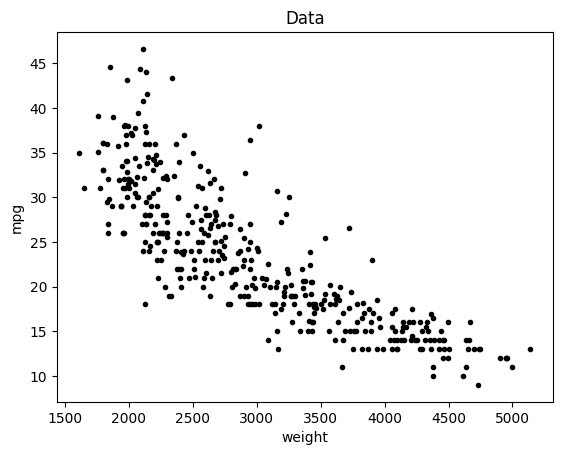

In [5]:
x = auto['weight']
y = auto['mpg']

# Plot the data
plt.scatter(x, y, color = "k", marker=".")

# Add a legend and labels

plt.xlabel("weight")
plt.ylabel("mpg")

# Add a title and adjust the margins
plt.title("Data")

# Show the plot
plt.show()

- The scatterplot and fitted line show negative association. Heavier cars on average get fewer miles per gallon.
- The scatterplot shows relationship between weight and mpg is not linear pattern
- Let's try fitting the model ignoring the linearity assumption first and see how the model performance and interpret the result

### Fit Linear Regression - Using Weight Variable

- Build the model using ols

In [6]:
# Create OLS model object
model = smf.ols("mpg ~ weight", auto)

# Fit the model
model_mpg_weight = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_weight = print_coef_std_err(model_mpg_weight)

### Insight

In [7]:
results_weight

,coef,std err
Intercept,46.216525,0.798672
weight,-0.007647,0.000258


$$\text{mpg} = 46 - 0.008\times\text{weight}$$

- If we compare two cars that have 1 difference in weight (lbs) the expected miles per galon of the lighter weight car have less 0.008 miles per gallon than the heavier car

In [8]:
weight_list = np.array([200, 400])

prediction_result = pd.DataFrame(data = {"weight": weight_list})

prediction_result["mpg_pred"] = model_mpg_weight.predict(prediction_result["weight"])
prediction_result

,weight,mpg_pred
0,200,44.687056
1,400,43.157588


In [9]:
diff_mpg_200 = prediction_result["mpg_pred"][1] - prediction_result["mpg_pred"][0]
diff_mpg_200

-1.5294685071559115

- The regression estimate that the the car that have lighter 200 lb weight have 1.5 more expected miles per galon
- The evidence from the regression can be processed to calculate the financial simulation whether the reduction of 200 lbs can financially possible and worth to achieve the standard miles per gallon

However this interpretation does not tell in term mpg comparison of percentage difference of weight

### Evaluation

- Visualize the data and the regression line

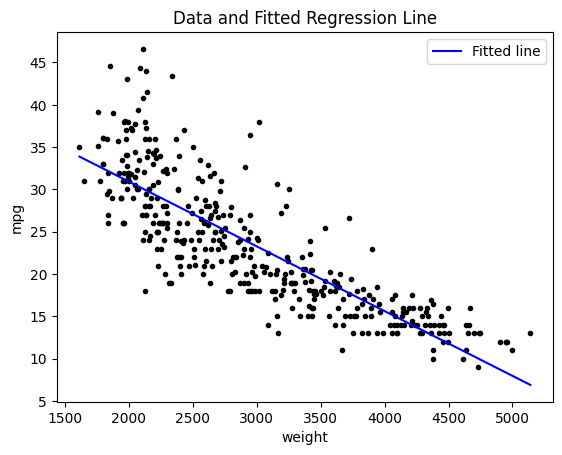

R-squared: 0.6926304331206254


In [13]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming 'auto' is your DataFrame and it contains columns 'weight' and 'mpg'
data = auto.copy()  # Make sure 'auto' is defined
predictor = "weight"
outcome = "mpg"

# Define the independent (X) and dependent (y) variables
X = sm.add_constant(data[predictor])  # Add a constant term for the intercept
y = data[outcome]

# Fit the regression model
model = sm.OLS(y, X)
results_model_weight = model.fit()

# Plot the data
plt.scatter(data[predictor], data[outcome], color="k", marker=".")

# Calculate the fitted values
a_hat = results_model_weight.params["const"]  # Intercept
b_hat = results_model_weight.params[predictor]  # Slope

x_domain = np.linspace(data[predictor].min(), data[predictor].max(), 10000)
fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color="b")

# Add labels and title
plt.ylabel(outcome)
plt.xlabel(predictor)
plt.title("Data and Fitted Regression Line")
plt.legend()
plt.show()



- The regression line is positioned beneath the majority of data points towards the left that correspond to lighter cars, above most of the points in the center, and once again below the points on the right that correspond to heavier cars.

#### Explained Variance



In [15]:

print("R-squared:", results_model_weight.rsquared)


R-squared: 0.6926304331206254


- The performance of the model was quite good $\approx 70\%$ variance tha explained by the model, However we can improve the model by doing log transformation as remedies for linearity assumption violation (the data we have shows curved pattern), and can get the interpretation of comparing certaing percentage difference of weight
- From the pattern we can choose to transform the predictor, weight columns

### Fit Linear Regression - Using Log Transform on Weight Variable

In [16]:
# create new column logweight as the transformation of weight column
auto['logweight'] = np.log(auto["weight"])

auto.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,logweight
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,8.161660
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,8.214194
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,8.142063


In [17]:
# Create OLS model object
model = smf.ols("mpg ~ logweight", auto)

# Fit the model
model_logtransform = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_weight_log = print_coef_std_err(model_logtransform)

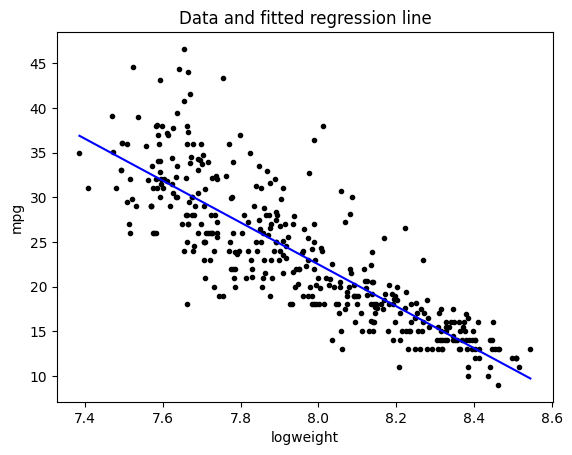

In [18]:
predictor = "logweight"
outcome = "mpg"
data = auto.copy()
results_ = results_weight_log.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "b")

# Add a legend and labels
# plt.legend()
plt.ylabel(outcome)
plt.xlabel(predictor)

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

#### Explained Variance after Log Transform

In [19]:
model_logtransform.rsquared

0.7126631343895842

- Doing log transformation on weight variables can change relationship to linear with the mpg
- Model with weight that being trasnform to log scale have higher explained variance, R-squared by 1%


1.   List item
2.   List item

### Insight

In [20]:
results_weight_log

,coef,std err
Intercept,209.943340,6.000179
logweight,-23.431738,0.753400


- Since we transform the weight, the idea in coeffiecient interpretation must in term log or percentage difference

$$\text{mpg} = 210 - 23\times\text{logweight}$$

- Interpretation in `log scale`: if we compare two cars that have `1 unit` difference in `logweight` the expected miles per galon of the lighter weight car have less 23 miles per gallon than the heavier car

> Remember to interpret b in this equation $$y=a+b\log x$$ is
the certain small delta times 100% difference of x , correspond to expected difference in y for about delta times b

We can interpret the equation easier by using certain small percentage change in weight, suppose we want to compare cars that have 10% difference of weight, it means the interpretation of coefficient of logweight is:

- If we compare two cars that have 10% difference of weight, the expected miles per galon of the lighter weight car have less 2,3 miles per gallon than the heavier car

Let's predict the mpg of car that weigh 200 lbs and compare with other car that weight 10% more

In [21]:
# store car's weight data form prediction to DataFrame
car1 = 200
car2 = 200+0.1*car1
weight_list = np.array([car1, car2])
prediction_result = pd.DataFrame(data = {"weight": weight_list})

# calculate the log transform of each car's weight
prediction_result["logweight"] = np.log(prediction_result["weight"])

# prediction results
prediction_result["mpg_pred"] = model_logtransform.predict(prediction_result["logweight"])
prediction_result

,weight,logweight,mpg_pred
0,200.0,5.298317,85.794554
1,220.0,5.393628,83.561271


In [22]:
diff_mpg_200 = prediction_result["mpg_pred"][1] - prediction_result["mpg_pred"][0]
diff_mpg_200

-2.233283198256899


- The regression estimate that the the car that have lighter 10% weight have 2.3 more expected miles per galon

## **Case 2 - United Nations: Urban Population and GDP**
---

United Nations conducted data that provides information on the urban population percentage and GDP per capita in each country in 2015. You are asked to explained how the percentage level of urban population relate to GDP per capita

### Load Data

In [24]:
population_gdp = pd.read_csv("urbpop_gdp.csv")
population_gdp

,Year,UrbanPopulation,GDP,Entity
0,2015,24.803,1928.0,Afghanistan
1,2015,57.434,10032.0,Albania
2,2015,70.848,14004.0,Algeria
3,2015,63.446,8689.0,Angola
4,2015,91.503,19502.0,Argentina
...,...,...,...,...
160,2015,88.154,18802.0,Venezuela
161,2015,33.809,5763.0,Vietnam
162,2015,34.777,2844.0,Yemen
163,2015,41.907,3478.0,Zambia


- Check the pattern in expenditure capita (exp_cap) and percentage urban population (perc_urban) variablesusing visualization



Text(0, 0.5, 'GDP')

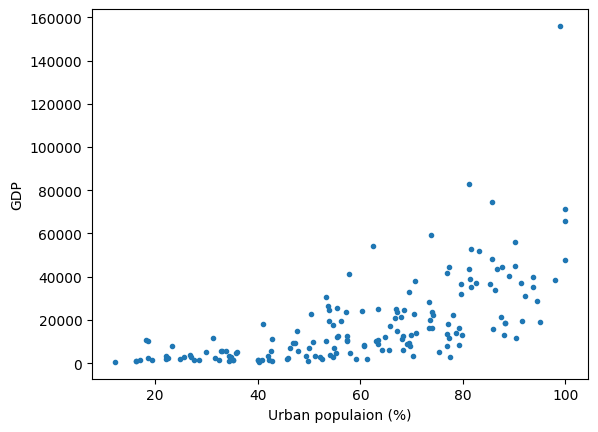

In [25]:
plt.scatter(population_gdp["UrbanPopulation"], population_gdp["GDP"], marker =".")
plt.xlabel("Urban populaion (%)")
plt.ylabel("GDP")

- The scatterplot shows relationship between urban population and GDP is not linear
- The scatterplot and fitted line show positive association. Higher percentage urban population tend to have higher gdp

### Log Transformation

Since we want to know the relationship of GDP and Urban population is not linear, we need transform each variables to their log scale before building the model

In [26]:
population_gdp["log_GDP"] = np.log(population_gdp["GDP"])

Let's compare the model which variables do not use log transformation and model which variables use log transformation

### Fit Linear Regression (without Tranformation)

In [27]:
# Create OLS model object
model = smf.ols("GDP ~ UrbanPopulation", population_gdp)

# Fit the model
results = model.fit()

# Extract the R-squared
results.rsquared

0.4056277966452785

### Fit Linear Regression (with Log Tranformation)

In [28]:
# Create OLS model object
model = smf.ols("log_GDP ~ UrbanPopulation", population_gdp)

# Fit the model
results_log = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_gdp_log = print_coef_std_err(results_log)

# Extract the R-squared
results_log.rsquared

0.5781448008922401

The model that use log in GDP variables have higher explained variance

- Visualization the data that use log transformation and the fitted model

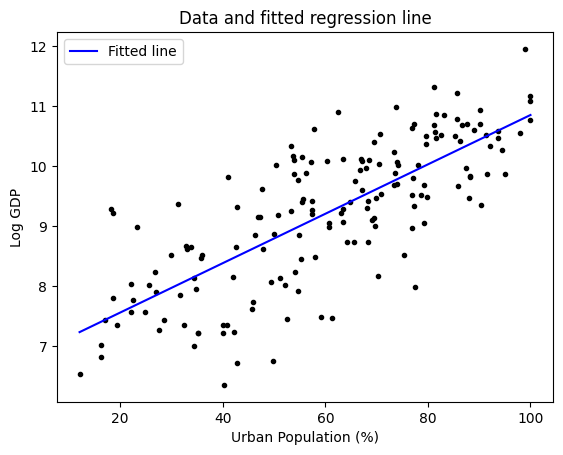

In [29]:
predictor = "UrbanPopulation"
outcome = "log_GDP"
data = population_gdp.copy()
results_ = results_gdp_log.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), len(data))

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "b")

# Add a legend and labels
plt.legend()
plt.ylabel("Log GDP")
plt.xlabel("Urban Population (%)")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

### Coefficient Interpretation

In [30]:
results_gdp_log

,coef,std err
Intercept,6.739193,0.176990
UrbanPopulation,0.041171,0.002755


> Remember to interpret b in this equation $$\log y=a+b x$$ is
one unit difference in predictor, correspond to expected percentage difference in y for about b times 100%

$$\text{log_GDP} = 6.7 - 0.04\times\text{UrbanPopulation (%)}$$
The interpretation of coefficient of UrbanPopulation:
It means  1%  positive difference in urban population, correspond to 4% difference in GPD per capita

## **Case 3 - Price Elasticity**
---

- A convenience store wants to know how much they should charge for a half gallon of orange juice. Currently they charge \$3 each.
- Economics explain when we have the cost of orange juice (dollars per carton) and sales' elasticity with respect to price, the ideal price to charge to maximize the profit would be:

$$\text{optimal_price}=\text{cost} \times \left( \frac{\text{elasticity}}{1+\text{elasticity}} \right)$$

- This store buys and stocks every half-gallon of orange juice at a cost of \$1.

- To determine the optimal price, need to determine the elasticity's sales with respect to the price.

- The **elasticity**'s price on sales describes the ratio of the change in demand (sales) to the change in price.

$$
\text{elasticity} = \cfrac{d \text{sales}/\text{sales}}{d \text{price}/\text{price}}
$$

- If $\text{elasticity} > 1.0$ it means, change in price yield a significant difference in demands

- The price is said to be inelastic ($\text{elasticity} < 1.0$) to sales, when the change in price yield no change in demand

**Our Business Objective**
- Maximizing the store's profit

**Tasks/Initiatives**
- Calculate the price elasticity
- Determine the optimal price

### Load Data

Data on orange juice sales were gathered by the chain from 50 locations during a weekend. The management ensured that the price varied among the stores, with each store selling orange juice for a price range between \$1.25 to \$4.25 per half-gallon.






In [32]:
juice = pd.read_csv("juice.csv")
juice.head()

,Sales,Price
0,43,1.5
1,12,3.9
2,15,3.8
3,27,1.9
4,8,4.2


- Check the pattern in Sales and Price variables in charges using visualization

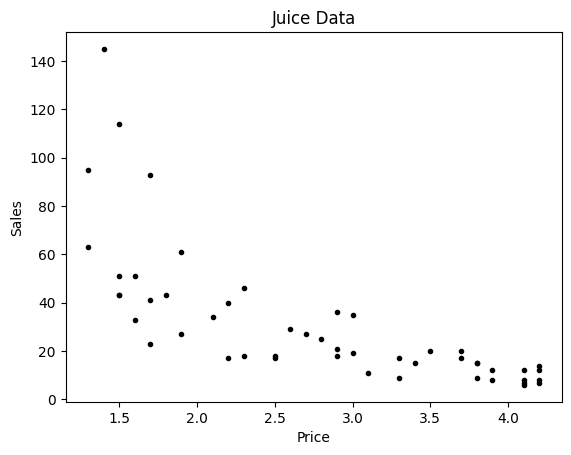

In [33]:
x = juice['Price']
y = juice['Sales']

# Plot the data
plt.scatter(x, y, color = "k", marker=".")

# Add a legend and labels

plt.xlabel("Price")
plt.ylabel("Sales")

# Add a title and adjust the margins
plt.title("Juice Data")

# Show the plot
plt.show()

- The scatterplot shows relationship between Price and Sales of Orange Juice is not linear pattern


- To know the elasticity from the data, we assumed there's relationship between each percentage price difference correspond to sales percentage difference. However our data in are in their raw unit not in percentage
- To estimate their relationship in percentage difference, we can build the regression to estimate the value of elasticity by appyling log on both sales and price
### Log Transformation
Transform each variables to their log scale before building the model

In [34]:
juice["logPrice"] = np.log(juice["Price"])
juice["logSales"] = np.log(juice["Sales"])

### Fit Linear Regression



In [35]:
# Create OLS model object
model = smf.ols("logSales ~ logPrice", juice)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_juice = print_coef_std_err(results)

In [36]:
results.rsquared

0.7553350395572439

- Visualize the data and the regression line

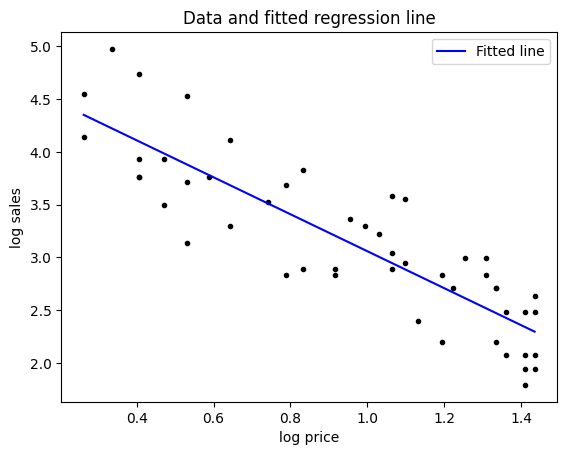

In [37]:
predictor = "logPrice"
outcome = "logSales"
data = juice.copy()
results_ = results_juice.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), len(data))

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "b")

# Add a legend and labels
plt.legend()
plt.ylabel("log sales")
plt.xlabel("log price")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

After log transformation the data shows linear pattern in their log scales
### Coefficient Interpretation

In [38]:
results_juice

,coef,std err
Intercept,4.811646,0.148033
logPrice,-1.752383,0.143954


$$\text{logSales} = 4.8 - 1.75\times\text{logPrice}$$

The interpretation of coefficient of logPrice:

- It means  1%  positive difference in Orange Juice Price, correspond to 1.75% negative difference in Sales
<font color="blue">
- Now, we know the **estimated elasticity** from the ols equation is -1.75
- Thus, increasing your price will reduce your product demand
</font>

### Calculate Optimal Price from the Cost and Elasticity

$$\text{optimal_price}=\text{cost} \times \left( \frac{\text{elasticity}}{1+\text{elasticity}} \right)$$
We know the cost of the orange juice per carton is $1 and the elasticity -1.75 from estimated OLS, if we subtitute them to  the above equation, we can get the optimal price for the juice

<font color="blue">The Optimal Price</font>

$$
\begin{align*}
\text{optimal_price} &= \text{cost} \times \left( \cfrac{\text{elasticity}}{1 + \text{elasticity}} \right) \\
&= (\$1) \times \left( \cfrac{-1.75}{1 + (-1.75)} \right) \\
&= (\$1) (2.33) \\
\text{optimal_price} &= \$2.33
\end{align*}
$$




#### Optimal Price and The Expected Profit

- Next, how's the optimal price will impact the profit?
- Let's demonstrate simple calculation to see how much the profit will differ if we compare the initial price (`$3`) and the optimal price (`$2.33`)

- We can calculate the total profit by this equation


$$\text{profit} = \text{sales} \times (\text{price}-\text{cost})$$
- Remember, the cost of orange juice per cartoon is `$1`

1. Predict the sales from given prices

In [39]:
# Price list
price_list = np.array([3.00, 2.33, 1.50])

prediction_results = pd.DataFrame(data = {"price": price_list})
prediction_results

,price
0,3.00
1,2.33
2,1.50


In [41]:
# Calculate the log transform of each price
prediction_results["logPrice"] = np.log(prediction_results["price"])

# Prediction results
prediction_results["pred_logSales"] = results.predict(prediction_results["logPrice"])
prediction_results["pred_Sales"] = np.exp(prediction_results["pred_logSales"])

# Display the results
prediction_results


,price,logPrice,pred_logSales,pred_Sales
0,3.00,1.098612,2.886456,17.929659
1,2.33,0.845868,3.329361,27.920485
2,1.50,0.405465,4.101116,60.407649


2. Calculate the profit

In [43]:
# Calculate the log transform of each price
prediction_results["logPrice"] = np.log(prediction_results["price"])

# Prediction results
prediction_results["pred_logSales"] = results.predict(prediction_results["logPrice"])
prediction_results["pred_Sales"] = np.exp(prediction_results["pred_logSales"])

# Calculate the profit
cost = 1
prediction_results["profit"] = prediction_results["pred_Sales"] \
                                * (prediction_results["price"] - cost)

# Display the results
prediction_results


,price,logPrice,pred_logSales,pred_Sales,profit
0,3.00,1.098612,2.886456,17.929659,35.859318
1,2.33,0.845868,3.329361,27.920485,37.134245
2,1.50,0.405465,4.101116,60.407649,30.203825


- The model predict a store can sells 18 cartons at `$3`. This initial price will gain profits of `$36.86`.
- On the other hand, at optimum price, `$2.33`, the model predicts sales of about 28 cartons with a profit of `$37.13`.
- The price that lower than optimum price, `$1.5`, is predicted might have sales of about 61 cartons, however the profit is the lowest,`$31`.
- By reducing the current price from `$3` to the optimal price based on the data and the model, around `$2.33`, the chain would generate more profit than lowering the price to `$1.5`.
### Summary
- Lowering the price will gain more sales, but less profit than optimum.
- Increasing the price will reduce sales, and also profit.
- With the optimum price, you will get optimum sales and maximum profit given the relationship between price-sales
- However, the potential profit increase is relatively small, and it may not be feasible if storing more orange juice leads to higher storage costs

Reference and dataset source:

- Statistics for Business: Decision Making and Analysis by Stine, R., & Foster, D.
- UN World Urbanization Prospects 2018: https://ourworldindata.org/grapher/urbanization-vs-gdp